# Histogram

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

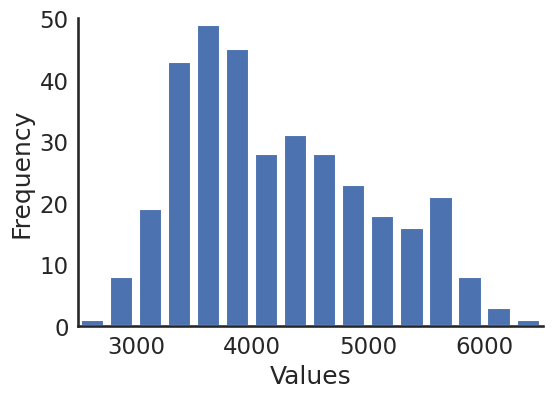

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_style_utils

penguins = sns.load_dataset("penguins")

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

plt.rcParams["ytick.right"] = False
hist_x_data = penguins["body_mass_g"].values

bins = np.arange(2000, 7000, 250)
hist = ax.hist(x=hist_x_data, bins=bins, rwidth=0.8) # bins = bins,
ax.tick_params(axis="x", which="minor", top=False, bottom=False)
ax.set_xlim(2500, 6500)
ax.set_ylim(0, 50)
ax.set_xlabel('Values', )
ax.set_ylabel('Frequency')
plt.show()